In [74]:
import os


In [75]:
os.chdir("/Users/enaikeleomoh/Documents/mywork/python-1/ML/LUNGS CANCER PREDICTION")

In [88]:
import numpy as np      # Import the NumPy library for numerical computations
import pandas as pd     # Import the Pandas library for data manipulation and analysis
from pandas. plotting import scatter_matrix
import math

# Assuming you have imported the necessary libraries for KNN
from sklearn.neighbors import KNeighborsClassifier

import matplotlib.pyplot as plt     # Import the Matplotlib library for data visualization
import seaborn as sns   # Import the Seaborn library for statistical data visualization
from sklearn.preprocessing import StandardScaler
# Importing necessary libraries for evaluation metrics
from sklearn.metrics import roc_curve, auc, recall_score, precision_score, accuracy_score, f1_score, confusion_matrix
from sklearn.linear_model import LogisticRegression     # Import the LogisticRegression class for logistic regression
from sklearn.model_selection import train_test_split    # Import the train_test_split function for splitting data
from sklearn.metrics import confusion_matrix    # Import the confusion_matrix function for evaluating classification results
from sklearn.metrics import classification_report   # Import the classification_report function for detailed classification metrics
from sklearn.neighbors import KNeighborsClassifier  # Import the KNeighborsClassifier class for k-nearest neighbors classification
from sklearn.tree import DecisionTreeClassifier     # Import the DecisionTreeClassifier class for decision tree classification
from sklearn.ensemble import RandomForestClassifier     # Import the RandomForestClassifier class for random forest classification
from sklearn.naive_bayes import GaussianNB      # Import the GaussianNB class for Gaussian naive Bayes classification
from sklearn.svm import SVC     # Import the SVC class for support vector machine classification

In [89]:
# Importing our dataset
# Importing our dataset
print("Dataset:")
dataset = pd.read_csv("lung_cancer_examples.csv")
print(len(dataset))
print(dataset.head())


Dataset:
59
     Name      Surname  Age  Smokes  AreaQ  Alkhol  Result
0    John         Wick   35       3      5       4       1
1    John  Constantine   27      20      2       5       1
2  Camela     Anderson   30       0      5       2       0
3    Alex       Telles   28       0      8       1       0
4   Diego     Maradona   68       4      5       6       1


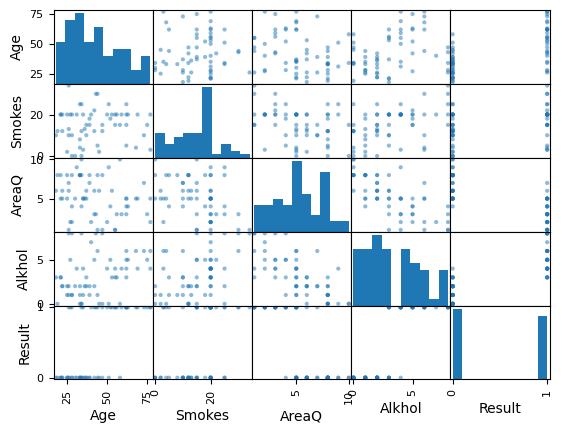

In [90]:
scatter_matrix(dataset)
plt.show()


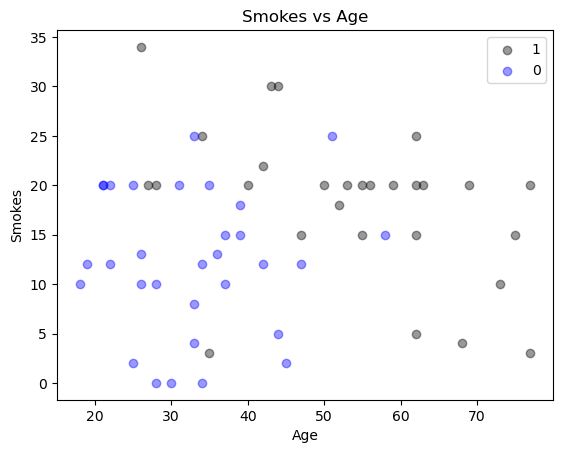

In [91]:
# Selecting rows where 'Result' is 1
A = dataset[dataset['Result'] == 1]

# Selecting rows where 'Result' is 0
B = dataset[dataset['Result'] == 0]

# Creating scatter plots for A and B
plt.scatter(A['Age'], A['Smokes'], color="Black", label="1", alpha=0.4)
plt.scatter(B['Age'], B['Smokes'], color="Blue", label="0", alpha=0.4)

# Adding labels and title
plt.xlabel("Age")
plt.ylabel("Smokes")
plt.legend()
plt.title("Smokes vs Age")

# Display the plot
plt.show()


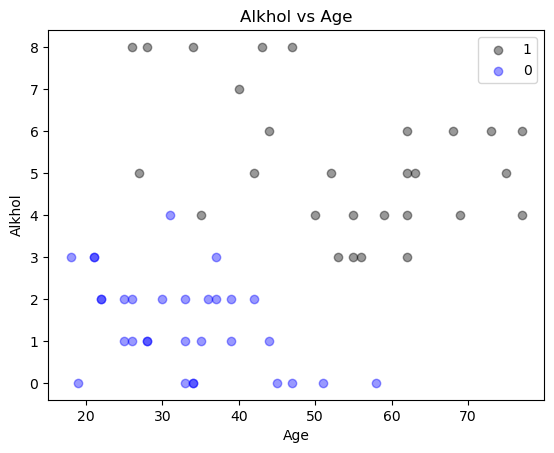

In [92]:
# Scatter plot for 'Alkhol' vs 'Age' for Result == 1
plt.scatter(A['Age'], A['Alkhol'], color="Black", label="1", alpha=0.4)

# Scatter plot for 'Alkhol' vs 'Age' for Result == 0
plt.scatter(B['Age'], B['Alkhol'], color="Blue", label="0", alpha=0.4)

# Adding labels and title
plt.xlabel("Age")
plt.ylabel("Alkhol")
plt.legend()
plt.title("Alkhol vs Age")

# Display the plot
plt.show()


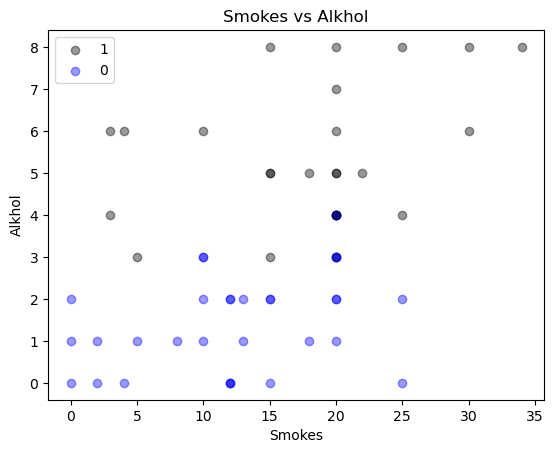

In [93]:
# Scatter plot for 'Alkhol' vs 'Smokes' for Result == 1
plt.scatter(A['Smokes'], A['Alkhol'], color="Black", label="1", alpha=0.4)

# Scatter plot for 'Alkhol' vs 'Smokes' for Result == 0
plt.scatter(B['Smokes'], B['Alkhol'], color="Blue", label="0", alpha=0.4)

# Adding labels and title
plt.xlabel("Smokes")
plt.ylabel("Alkhol")
plt.legend()
plt.title("Smokes vs Alkhol")

# Display the plot
plt.show()


In [94]:
# Selecting features (x) and target variable (y) from the dataset
# We're extracting columns 3 to 4 for features (x) and column 6 for the target variable (y)
x = dataset.iloc[:, 3:5]  # Features (independent variables)
y = dataset.iloc[:, 6]    # Target variable (dependent variable)

# Splitting the dataset into training and testing sets
# We're using the train_test_split function from scikit-learn to divide the data
# random_state is set to ensure reproducibility, and test_size determines the proportion of data used for testing (20% in this case)
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0, test_size=0.2)


In [95]:
# Creating a StandardScaler object
sc_x = StandardScaler()

# Scaling (standardizing) the features in the training set
x_train = sc_x.fit_transform(x_train)

# Scaling the features in the test set using the same scaling parameters as the training set
x_test = sc_x.transform(x_test)

#  starting to use the KNN algorithm
print("--------------****Using KNN Algorithm****-----------------")

# Assuming you have imported the necessary library for the KNN algorithm
from sklearn.neighbors import KNeighborsClassifier

# Importing the math module for mathematical operations
import math

# Calculating the square root of the number of training samples
a = math.sqrt(len(y_train))

# Printing the result, which represents a commonly used parameter in the KNN algorithm
print(a)

--------------****Using KNN Algorithm****-----------------
6.855654600401044


In [106]:

# Define a KNN classifier with specific settings:
# - n_neighbors: Number of neighbors to consider (here, 5 neighbors)
# - p: Parameter for the Minkowski distance (here, p=2 corresponds to Euclidean distance)
# - metric: Distance metric to use for the tree (here, 'euclidean' distance)
classifier = KNeighborsClassifier(n_neighbors=5, p=2, metric='euclidean')

# Train (fit) the KNN model using the training data
classifier.fit(x_train, y_train)

# Use the trained model to make predictions on the test set
y_pred = classifier.predict(x_test)

# Print the predicted labels for the test set
print(y_pred)


[0 0 1 1 0 0 0 0 1 1 0 0]


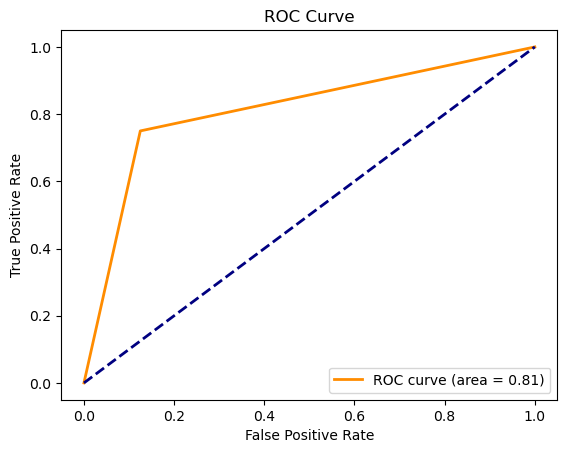

Recall: 75.00
Precision: 75.00
Accuracy: 83.33
F1 Score: 75.00
Confusion Matrix:
[[7 1]
 [1 3]]


In [107]:
# Evaluating model

# ROC curve
# This section calculates and plots the Receiver Operating Characteristic (ROC) curve. ROC curves help visualize the performance of a classification model.
# fpr, tpr, thresholds = roc_curve(y_test, y_pred)
# roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

# Recall 
# Recall, or sensitivity, is the ability of a classification model 
# to identify all relevant instances in the dataset.
# Recall is the proportion of actual positive cases that were correctly identified by the model.

recall = recall_score(y_test, y_pred)*100
print('Recall: {:.2f}'.format(recall))

# Precision
# This section calculates and prints precision, 
# which is the proportion of predicted positive cases
# that were correctly identified by the model.

# Precision is the ability of a classification model to return only relevant instances.
precision = precision_score(y_test, y_pred)*100
print('Precision: {:.2f}'.format(precision))

# Accuracy
# The accuracy of the model is calculated and printed.
# Accuracy is the proportion of correctly predicted instances out of the total instances.
# it the ratio of correctly predicted observation to the total observations.

accuracy = accuracy_score(y_test, y_pred)*100
print('Accuracy: {:.2f}'.format(accuracy))

# F1 Score
# F1 Score is the harmonic mean of precision and recall, providing a balance between the two.

f1 = f1_score(y_test, y_pred) *100
print('F1 Score: {:.2f}'.format(f1))

# Confusion Matrix(evaluate the performance of a classification model)
#  The confusion matrix provides a summary of the model's
# performance, showing the number of true positives, 
# true negatives, false positives, and false negatives.
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

In [108]:
# Using Decision Tree Algorithm

# Create a Decision Tree classifier
classifier_dt = DecisionTreeClassifier()

# Fit (train) the Decision Tree model on the training data
classifier_dt.fit(x_train, y_train)

# Print a message indicating the start of the Decision Tree algorithm
print("-----------------****Using Decision Tree Algorithm****----------------")

# Calculate the accuracy on the training set
# This measures how well the model performs on the data it was trained on
accu_train = np.sum(classifier_dt.predict(x_train) == y_train) / float(len(y_train))
print('Classification accuracy on train:', accu_train * 100)

# Calculate the accuracy on the test set
# This measures how well the model generalizes to new, unseen data
accu_test = np.sum(classifier_dt.predict(x_test) == y_test) / float(len(y_test))
print('Classification accuracy on test:', accu_test * 100)


-----------------****Using Decision Tree Algorithm****----------------
Classification accuracy on train: 95.74468085106383
Classification accuracy on test: 75.0
